## Suppl. Fig2: faceted volcano plot

In [1]:
import sys
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

script_path = Path.cwd().parent.parent.parent / "script"
data_path = Path.cwd().parent.parent.parent / "data"
sys.path.append(str(script_path))
from utils.volcano import load_volcano_data

output_dir = Path.cwd() / "output"
output_dir.mkdir(exist_ok=True)

### Load data

In [2]:
#timestamp = datetime.now().strftime("%Y-%m-%d")
#print(f"Timestamp: {timestamp}")

In [3]:
# manually set the timestamp to use the intermediate results from another date
timestamp = "2023-10-21-imp5"

In [4]:
# define files to load
enrichment_dir = Path.cwd().parent.parent / "enrichment"
volcano_csv_path = enrichment_dir / "output" / "enrichment_and_volcano_tables" / f'{timestamp}_volcano_table.csv'
clusters_csv = Path.cwd().parent.parent / "Fig2" / "panel_C" / "output" / f"{timestamp}_graph-based_annotations.csv"
try:
    # load the file
    volcano_df, ip_name_with_comparts, Gene_name_canonical, cluster_highlights = load_volcano_data(volcano_csv_path, clusters_csv)
except FileNotFoundError:
    print(f"File {volcano_csv_path} not found.\nPlease run the enrichment analysis first or specify the correct timestamp, current value is {timestamp}")
except pd.errors.ParserError:
    print(f"There was an error parsing the CSV file at {volcano_csv_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [5]:
# check cluster_highlights are in cluster_annotation
# cluster_highlights is a list clusters names to highlight in each pulldown
cluster_labels = volcano_df[("metadata", "consensus_graph_annnotation")].unique()
for i in cluster_highlights:
    for j in i:
        print(f"{j} not in consensus_graph_annnotation") if j not in cluster_labels else None

### Set up a grid of subplots

In [6]:
# number of sub plots
print(f"number of subplots: {len(ip_name_with_comparts)}")
nrows = 6
ncols = 6
print(f"nrows: {nrows}, ncols: {ncols}")

number of subplots: 36
nrows: 6, ncols: 6


### Fill the grid of subplots

In [7]:
# settings
fig_width = 17  # inch (2x letter width 8.5)
fig_height = 22  # inch (2x letter height 11)
highlight_color = "#fc8c03"
rest_points_color = "#d6d4d4"
plt.rcParams["pdf.fonttype"] = 42  # for illustrator
rasterized_points = True  # rasterize the datapoints, or else import to illustrator will be very slow

In [8]:
volcano_df

metadata  \
                                            Protein IDs   
0         A0A023T6R1;Q96A72;F5H6P7;F5H6N1;F5H3U9;F5H124   
1                          Q9Y5S9;A0A023T787;A0A0J9YW13   
2     A0A0C4DFM1;A0A024QYR3;Q92544;B4DH88;B4DKC1;Q6Z...   
3     A0A024QYR6;A0A1V0DNR7;A0A6G6A825;F6KD02;F6KD01...   
4                              Q99805;A0A024QYR8;B3KSG9   
...                                                 ...   
8594                                             X5D7P8   
8595                                             X5D8X9   
8596  X5DQV1;X5DNI1;B3KV96;E9PD68;B3KXQ5;Q14194;B3KT...   
8597                                             X5DQZ7   
8598                                             X6RHX1   

                                                                          \
                                   Majority protein IDs       Gene names   
0                       A0A023T6R1;Q96A72;F5H6P7;F5H6N1  FLJ10292;MAGOHB   
1                                     Q9Y5S9;A0A023T787       RBM8A;RBM8   
2     A0A0C4DFM1;A0A024QYR3;Q92544;B4DH88;B4DKC1;Q6ZTK5           TM9SF4   
3     A0A024QYR6;A0A1V0DNR7;A0A6G6A825;F6KD02;F6KD01...             PTEN   
4                              Q99805;A0A024QYR8;B3KSG9           TM9SF2   
...                                                 ...              ...   
8594                                             X5D7P8            STK39   
8595                                             X5D8X9          CNTNAP2   
8596  X5DQV1;X5DNI1;B3KV96;E9PD68;B3KXQ5;Q14194;B3KT...            CRMP1   
8597                                             X5DQZ7             GPX1   
8598                                             X6RHX1            SCYL3   

                                                                     \
     naming_status     Itzhak_compartment             Itzhak_global   
0          checked  Large Protein Complex        Broad distribution   
1          checked  Large Protein Complex        Broad distribution   
2          checked                  Golgi         Mostly Organellar   
3          checked                    NaN          Mostly Cytosolic   
4          checked                  Golgi         Mostly Organellar   
...            ...                    ...                       ...   
8594       checked                    NaN                       NaN   
8595       checked                    NaN                       NaN   
8596       checked                    NaN                       NaN   
8597       checked                    NaN         Mostly Organellar   
8598       checked                    NaN  Organellar and Cytosolic   

                                                                    \
        v0_clusters Gene_name_canonical              v1p2_clusters   
0           nucleus              MAGOHB                    nucleus   
1           nucleus               RBM8A                        NaN   
2             Golgi              TM9SF4                      Golgi   
3               NaN                PTEN                    cytosol   
4             Golgi              TM9SF2                      Golgi   
...             ...                 ...                        ...   
8594            NaN      STK39 (X5D7P8)                    cytosol   
8595            NaN             CNTNAP2  plasma_membrane_signaling   
8596            NaN               CRMP1                    cytosol   
8597  mitochondrion       GPX1 (X5DQZ7)                trans_Golgi   
8598            NaN      SCYL3 (X6RHX1)                        NaN   

                            ... GPR107 (Golgi) EEA1 (endosome)            \
     v1_clusters_seed_8842  ...          pvals      enrichment     pvals   
0                  nucleus  ...       0.602559       -1.264236  0.828252   
1                  nucleus  ...       1.907147       -1.618800  1.194295   
2                    Golgi  ...       5.228285       -1.672800  0.342318   
3                  cytosol  ...       0.082696        0.255801  0.061954   

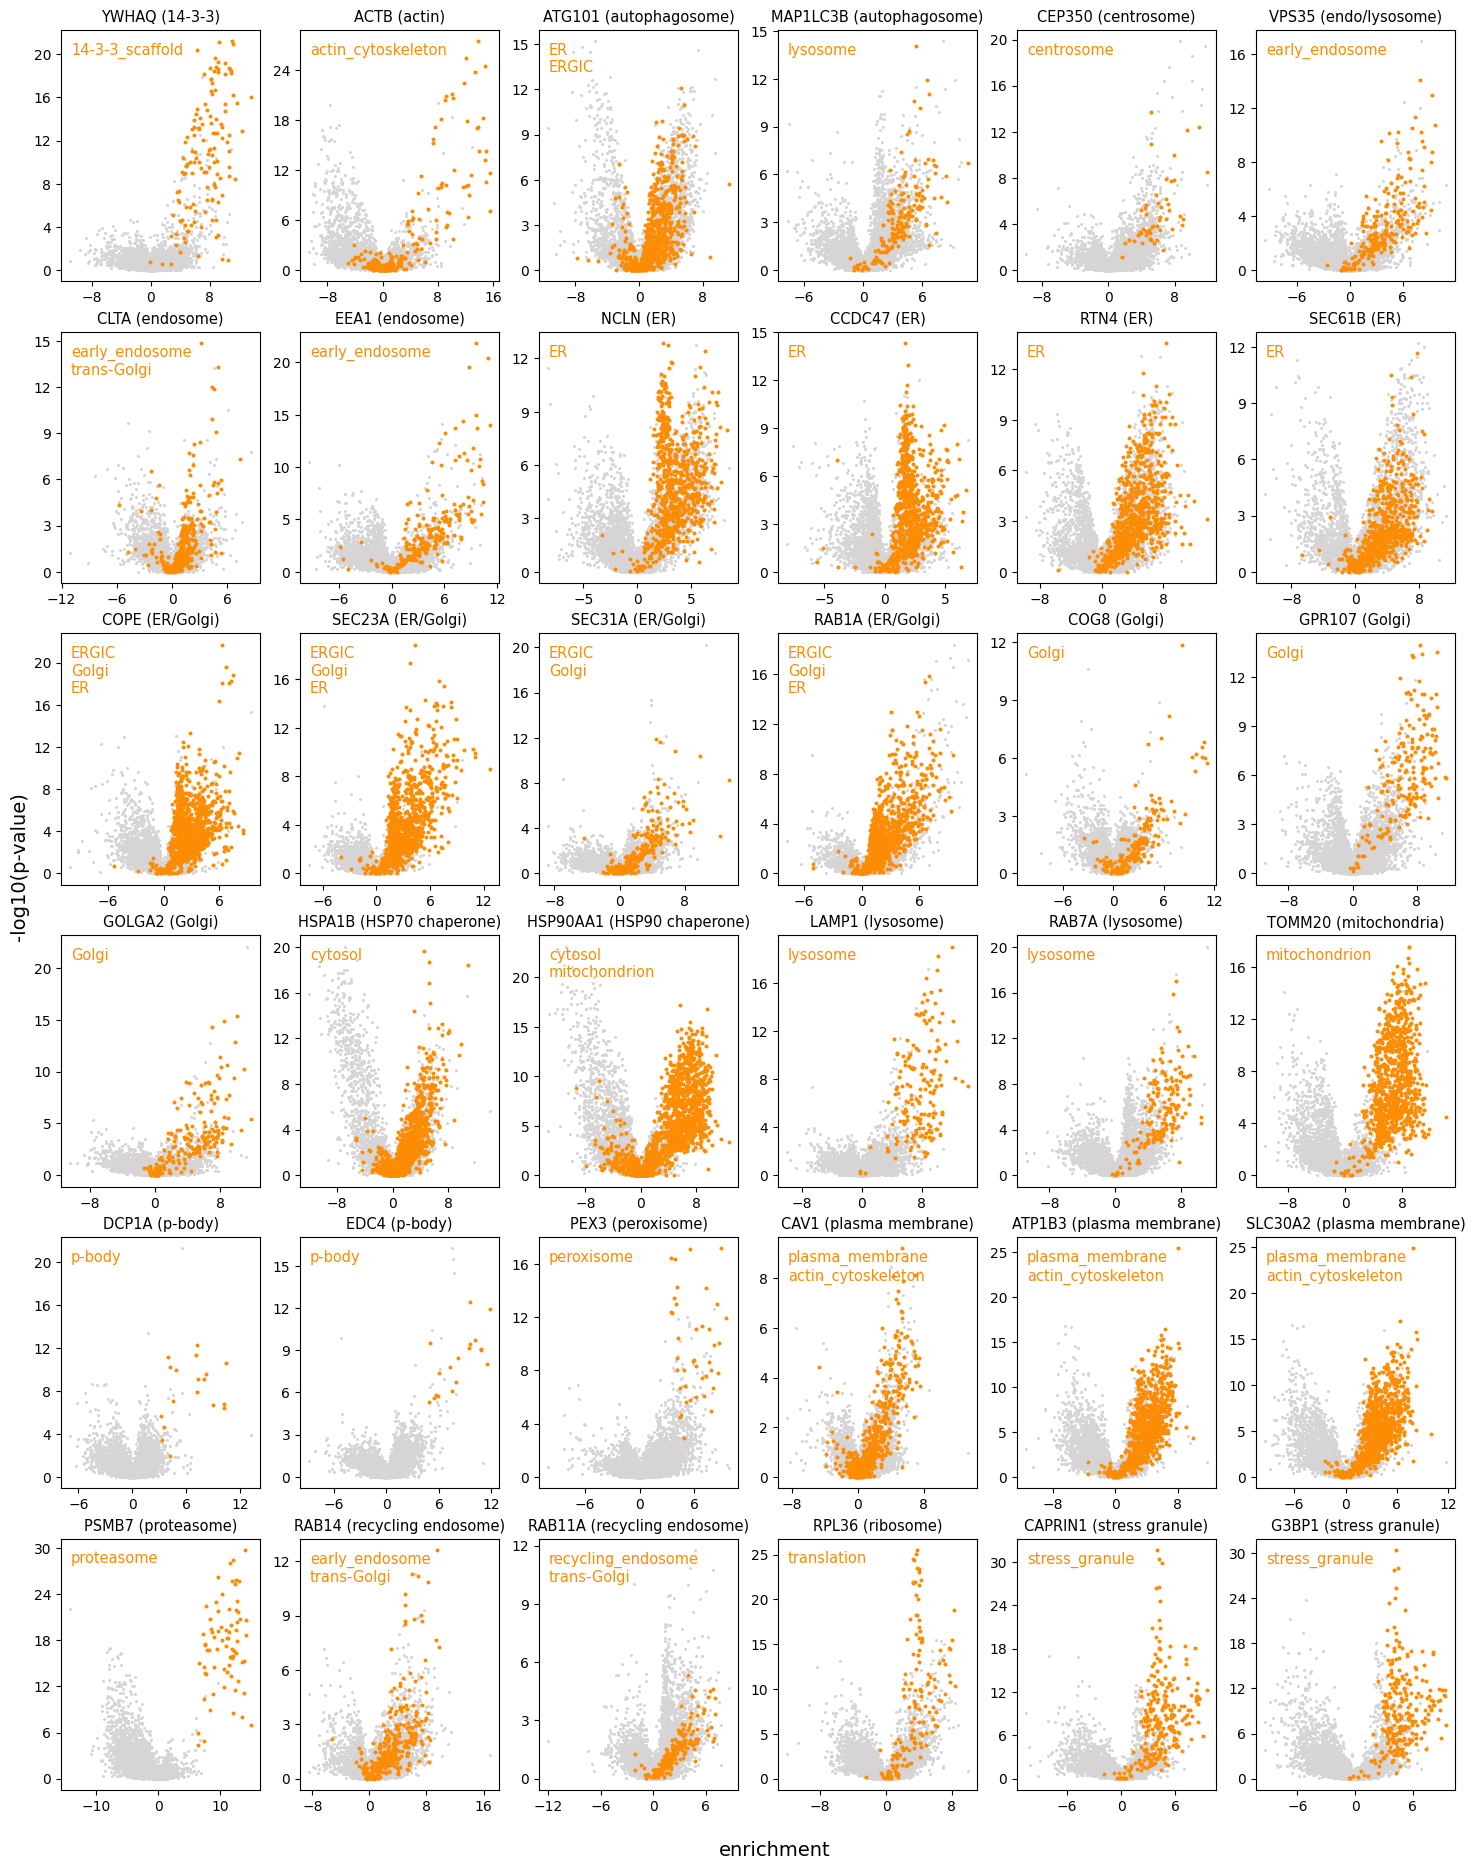

In [13]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(
    fig_width, fig_height
)  # Set the figure size to letter size (8.5 x 11 inches)
fig.subplots_adjust(
    left=0.08, bottom=0.08
)  # set the left and bottom margin for x and y axis labels

idx = 0
for r in range(nrows):
    for c in range(ncols):
        # get data for a specific pulldown
        n = ip_name_with_comparts[idx]
        pulldown_df = volcano_df[n].copy()
        pulldown_df.rename(columns={"pvals": " -log10(p-value)"}, inplace=True)
        pulldown_df["p-value"] = round(10 ** (-pulldown_df[" -log10(p-value)"]), 4)
        pulldown_df["Gene name canonical"] = volcano_df.loc[:, ("metadata", "Gene_name_canonical")]
        pulldown_df["consensus_graph_annnotation"] = volcano_df.loc[:, ("metadata", "consensus_graph_annnotation")]

        # highlights
        current_highlights = cluster_highlights[idx]  # get the list of Nov16 clusters to highlight
        colors = [highlight_color if c in current_highlights else rest_points_color for c in pulldown_df["consensus_graph_annnotation"]]

        # draw volcano plot (uniform size of points)
        #axs[r,c].scatter(x=pulldown_df["enrichment"], y=pulldown_df[" -log10(p-value)"], s=1.5, color=colors)

        # draw volcano plot (highlighted points are bigger)
        hilighted_point_size = 3.5
        rest_point_size = 1.5
        highlight_df = pulldown_df[pulldown_df["consensus_graph_annnotation"].isin(current_highlights)]
        rest_df = pulldown_df[~pulldown_df["consensus_graph_annnotation"].isin(current_highlights)]
        axs[r, c].scatter(
            x=rest_df["enrichment"], y=rest_df[" -log10(p-value)"],
            s=rest_point_size, color=rest_points_color, rasterized=rasterized_points,
        )
        axs[r, c].scatter(
            x=highlight_df["enrichment"], y=highlight_df[" -log10(p-value)"],
            s=hilighted_point_size, color=highlight_color, rasterized=rasterized_points,
        )

        # set title
        axs[r, c].set_title(ip_name_with_comparts[idx], fontsize=10.5)

        # add text to denote the highlighted clusters
        axs[r, c].text(
            0.05, 0.95, "\n".join(current_highlights),
            ha="left", va="top",
            color=highlight_color, transform=axs[r, c].transAxes, fontsize=10.5,
        )

        # Force x-axis to display integer ticks,
        axs[r, c].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
        # Force y-axis to display integer ticks, or else the gap between plots will be different
        axs[r, c].yaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))

        idx += 1

# set a common y axis label
fig.text(0.05, 0.5, "-log10(p-value)", va="center", rotation="vertical", fontsize=14)
# set a common x axis label
fig.text(0.5, 0.05, "enrichment", ha="center", fontsize=14)
# save figure as pdf
fig.savefig(output_dir / "Suppl_fig2.pdf", bbox_inches="tight", dpi=300, format="pdf")